Calculate stats for combined light curves (mean, median) x (mag, magerr) x (all filters) / per survey + N epochs / filter 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

outDir = '../data_products/SDSS-PTF-CRTS-PS1_/'
done_lcs = os.listdir(outDir)
#done_lcs.remove('.DS_Store')

### [skip if done once](#read_summary) Make a summary table with aggregate information per combined light curve 

Make dictionaries to store the aggregate information ... 

In [4]:
from itertools import product

summary = {}
summary['lcname'] = done_lcs
summary['SDSS'] = {}
for a,b,c in product(['median'], [f for f in 'ugriz'], ['mag', 'err']):
    summary['SDSS'][a+b+c] = np.zeros_like(done_lcs, dtype=float)
for a,b in product([f for f in 'ugriz'],['N']):
    summary['SDSS'][a+b] =np.zeros_like(done_lcs, dtype=float)
    
summary['PS1'] = {}
for a,b,c in product(['median'], [f for f in 'grizy'],['mag', 'err']):
    summary['PS1'][a+b+c] = np.zeros_like(done_lcs, dtype=float)
for a,b in product([f for f in 'grizy'],['N']):
    summary['PS1'][a+b] =np.zeros_like(done_lcs, dtype=float)

summary['PTF'] = {}
for a,b,c in product(['median'], [f for f in '12'], ['mag', 'err']):
    summary['PTF'][a+b+c] = np.zeros_like(done_lcs, dtype=float)
for a,b in product([f for f in '12'],['N']):
    summary['PTF'][a+b] =np.zeros_like(done_lcs, dtype=float)
   
summary['CRTS'] = {}
for a,b,c in product(['median'], ['w'], ['mag', 'err']):
    summary['CRTS'][a+b+c] = np.zeros_like(done_lcs, dtype=float)
    
summary['CRTS']['wN'] = np.zeros_like(done_lcs, dtype=float)

Iterate over all objects, and all epochs that were taken from a given survey... 

In [6]:
surveys = ['SDSS', 'PS1', 'PTF', 'CRTS']
for i in range(len(done_lcs)):
    if i % 10 == 0  : 
        print(i)
    fname = outDir+done_lcs[i]
    lc = Table.read(fname, format='ascii')

    for survey in surveys :
        #print(survey)
        if survey is 'SDSS' : 
            filters = 'ugriz'
        if survey is 'PS1':
            filters = 'grizy'
        if survey is 'PTF':
            filters = '12'
        if survey is 'CRTS':
            filters= 'w'
        m1 = lc['survey'] == survey.lower()
        for f in filters :
            m2 = lc['filter'] == f
            m = m1*m2 
            summary[survey]['median'+f+'err'][i] = np.median(lc['magerr'][m])
            summary[survey]['median'+f+'mag'][i] = np.median(lc['mag'][m])
            summary[survey][f+'N'][i] = len(lc['mag'][m])


0
10


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2906: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


20
30
40
50


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Warning: converting a masked element to nan.
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Warning: converting a masked element to nan.


320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2220
2230
2240
2250
2260
2270
2280
2290
2300
2310
2320
2330
2340
2350
2360
2370
2380
2390
2400
2410
2420
2430
2440
245

In [44]:
summary.keys()

dict_keys(['lcname', 'SDSS', 'PS1', 'PTF', 'CRTS'])

Combine all dicts into cols of one big table, with one row per object ... 

In [48]:
summary_ = Table()
summary_['lcname'] = summary['lcname']

In [49]:
for survey in surveys :
    #print(survey)
    if survey is 'SDSS' : 
        filters = 'ugriz'
    if survey is 'PS1':
        filters = 'grizy'
    if survey is 'PTF':
        filters = '12'
    if survey is 'CRTS':
        filters= 'w'
    for f in filters: 
        c = Column(summary[survey][f+'N'], name=survey+'_'+f+'N')
        summary_.add_column(c)
        c = Column(summary[survey]['median'+f+'err'], 
                   name = survey+'_'+'median'+f+'err')
        summary_.add_column(c)
        c = Column(summary[survey]['median'+f+'mag'], 
                   name = survey+'_'+'median'+f+'mag')
        summary_.add_column(c)

In [51]:
summary_.write('summary_combined_lc_info.txt', format='ascii',
              overwrite=True)

### Read the summary results: the median SDSS, PS1, PTF, CRTS photometry for all quasars.<a id='read_summary'></a>

In [3]:
summary_ = Table.read('summary_combined_lc_info.txt', format='ascii')

In [54]:
summary_

lcname,SDSS_uN,SDSS_medianuerr,SDSS_medianumag,SDSS_gN,SDSS_mediangerr,SDSS_mediangmag,SDSS_rN,SDSS_medianrerr,SDSS_medianrmag,SDSS_iN,SDSS_medianierr,SDSS_medianimag,SDSS_zN,SDSS_medianzerr,SDSS_medianzmag,PS1_gN,PS1_mediangerr,PS1_mediangmag,PS1_rN,PS1_medianrerr,PS1_medianrmag,PS1_iN,PS1_medianierr,PS1_medianimag,PS1_zN,PS1_medianzerr,PS1_medianzmag,PS1_yN,PS1_medianyerr,PS1_medianymag,PTF_1N,PTF_median1err,PTF_median1mag,PTF_2N,PTF_median2err,PTF_median2mag,CRTS_wN,CRTS_medianwerr,CRTS_medianwmag
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1441903.txt,56.0,0.073,20.5065,55.0,0.028,20.207,55.0,0.028,20.06,56.0,0.031,19.7965,54.0,0.093,19.7545,15.0,0.0713645,20.654379,21.0,0.0625128,20.400947,11.0,0.0465617,20.246757,7.0,0.0920465,20.129613,3.0,0.185767,19.925352,0.0,nan,nan,16.0,0.1405,20.468,123.0,0.31,20.11
908716.txt,56.0,0.033,19.265,58.0,0.014,18.952,59.0,0.013,18.679,56.0,0.015,18.6005,59.0,0.036,18.572,8.0,0.0199587,19.2070275,11.0,0.0198069,18.830835,14.0,0.0174808,18.7201345,14.0,0.037025,18.7127095,16.0,0.0734949,18.746155,0.0,nan,nan,15.0,0.052,18.802,261.0,0.15,18.68
100520.txt,37.0,0.029,18.945,34.0,0.015,18.7245,36.0,0.014,18.5345,37.0,0.017,18.438,36.0,0.031,18.2505,11.0,0.0148272,18.623022,19.0,0.0136626,18.588853,10.0,0.0121258,18.425458,13.0,0.0249324,18.274665,7.0,0.0454908,18.266294,0.0,nan,nan,2.0,0.0605,18.507,113.0,0.08,18.33
3759755.txt,68.0,0.079,20.3925,69.0,0.023,20.145,70.0,0.03,20.1095,70.0,0.034,19.7745,71.0,0.098,19.71,9.0,0.0421427,20.278632,9.0,0.0423416,20.149534,9.0,0.03603,19.84147,11.0,0.0565525,19.791262,9.0,0.130102,19.770823,0.0,nan,nan,20.0,0.113,20.2825,183.0,0.28,19.91
505877.txt,6.0,0.0475,19.465,7.0,0.019,19.322,6.0,0.0215,18.9885,6.0,0.0235,18.821,6.0,0.0505,18.4535,12.0,0.02071855,19.2999495,14.0,0.01924305,19.035913,10.0,0.01925445,18.9167575,13.0,0.0263498,18.51926,11.0,0.063562,18.694333,0.0,nan,nan,26.0,0.0595,18.8245,370.0,0.16,18.79
248292.txt,52.0,0.075,20.44,54.0,0.029,20.478,55.0,0.037,20.484,56.0,0.0485,20.307,56.0,0.129,20.2175,9.0,0.0651289,20.801468,20.0,0.106127,20.874993,10.0,0.07561425,20.478017,10.0,0.1396815,20.282853,2.0,0.09941805,20.0306985,2.0,0.13,20.9,0.0,nan,nan,119.0,0.2,20.45
1225760.txt,114.0,0.055,20.0255,122.0,0.02,19.9285,127.0,0.023,19.882,126.0,0.026,19.725,122.0,0.109,19.761,9.0,0.0552703,20.392363,12.0,0.04928135,20.215812,13.0,0.0424295,19.969071,10.0,0.101491,20.015992,5.0,0.177989,19.87847,0.0,nan,nan,12.0,0.103,20.198,183.0,0.25,19.86
953706.txt,50.0,0.073,20.3775,58.0,0.024,20.0335,59.0,0.019,19.356,59.0,0.021,19.291,58.0,0.0665,19.33,7.0,0.0343499,20.000643,18.0,0.02332075,19.3128485,6.0,0.0272724,19.3702535,11.0,0.0582776,19.419795,9.0,0.137477,19.293759,0.0,nan,nan,1.0,0.069,19.381,278.0,0.2,19.39
3537034.txt,55.0,0.042,19.676,53.0,0.015,19.437,55.0,0.014,19.11,56.0,0.018,19.1265,53.0,0.066,19.134,12.0,0.0245447,19.242361,15.0,0.0211546,18.979497,15.0,0.0185514,18.991981,16.0,0.04611045,19.079953,7.0,0.103589,18.951916,0.0,nan,nan,9.0,0.06,18.993,119.0,0.17,19.02


Plot the  SDSS colors, to confirm which region of the color-color space is occupied by qusars 

0
1
2
3


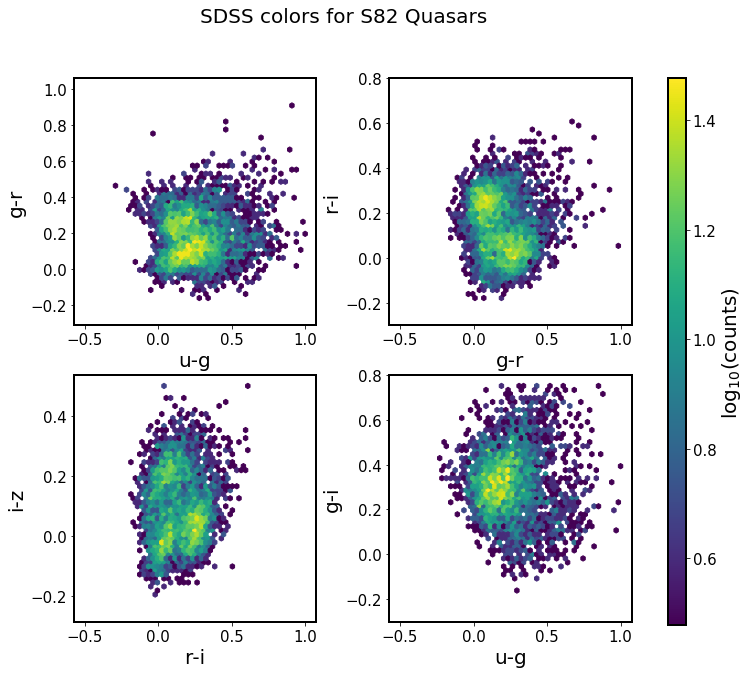

In [53]:
%matplotlib inline
u = summary_['SDSS_medianumag']
g = summary_['SDSS_mediangmag']
r = summary_['SDSS_medianrmag']
i = summary_['SDSS_medianimag']
z = summary_['SDSS_medianzmag']

fig,axs = plt.subplots(2,2, figsize=(10,10))
axes = np.ravel(axs)
xs = [u-g, g-r, r-i, u-g ]
ys = [g-r, r-i, i-z, g-i ]

xlabels = ['u-g', 'g-r', 'r-i', 'u-g' ]
ylabels = ['g-r', 'r-i', 'i-z', 'g-i' ]

extents = [[-0.5,1, -0.25, 1 ],
           [-0.5,1, -0.25, 0.75],
           [-0.5,1, -0.25, 0.5],
           [-0.5,1, -0.25, 0.75],
          ]
for  j , ax in enumerate(axes) : 
    print(j)
    image  = ax.hexbin(xs[j], ys[j], mincnt=2, extent=(extents[j]), gridsize=50, bins='log')
    ax.set_xlabel(xlabels[j])
    ax.set_ylabel(ylabels[j])
fig.subplots_adjust(wspace=0.3)
fig.suptitle('SDSS colors for S82 Quasars', fontsize=20)
axs = fig.add_axes([0.95,0.12, 0.025,0.76])
plt.colorbar(mappable = image, cax = axs, label = r'$\log_{10}{(\mathrm{counts})}$' )
plt.savefig('SDSS_S82_QSO_colors.png', bbox_inches='tight')

In [4]:
plt.colorbar?

NB : Since filters go 'u g r i z' from bluer to redder, the convention is to always define a 'color' by subtracting the redder filter from the bluer filter. That way any color has negative values for intrinsically bluer objects - emitting more in the blue part of the spectrum (eg. QSO, RR Lyr), and positive values for redder objects (eg. M stars).  

Selecting stars according to their g-i color ensures that we select the same color objects as quasars . 

Good - that looks like the QSO locus in Sesar+2007 , Fig. 3

## Apply the photometric offsets ... 

In [5]:
tonry = Table.read('Tonry2012_Table6.txt', 
                   format='ascii', names=['x','y', 'A_0', 'A_1','A_2', '+or-_',
                                          'B_0','B_1','+or-'],)

In [6]:
tonry

x,y,A_0,A_1,A_2,+or-_,B_0,B_1,+or-
str10,str13,float64,float64,float64,float64,float64,float64,float64
(g-r)_SDSS,(g_P1-g_SDSS),-0.011,-0.125,-0.015,0.006,-0.012,-0.139,0.007
(g-r)_SDSS,(r_P1-r_SDSS),0.001,-0.006,-0.002,0.002,0.0,-0.007,0.002
(g-r)_SDSS,(i_P1-i_SDSS),0.004,-0.014,0.001,0.003,0.004,-0.014,0.003
(g-r)_SDSS,(z_P1-z_SDSS),-0.013,0.04,-0.001,0.009,-0.013,0.039,0.009
(g-r)_SDSS,(y_P1-z_SDSS),0.031,-0.106,0.011,0.023,0.031,-0.095,0.024
(g-r)_SDSS,(w_P1-r_SDSS),0.018,0.118,-0.091,0.012,0.012,0.039,0.025


In [598]:
tonry = Table.read('Tonry2012_Table6.txt', 
                   format='ascii', names=['x','y', 'A_0', 'A_1','A_2', '+or-_',
                                          'B_0','B_1','+or-'],)

def shift_to_synthetic_SDSS(lc, summary_,tonry, ):
    # select median SDSS magnitudes per quasar from 
    # the summary table 
    mask = summary_['lcname'] == lcname
    gSDSS = summary_[mask]['SDSS_mediangmag'].data
    rSDSS = summary_[mask]['SDSS_medianrmag'].data
    iSDSS = summary_[mask]['SDSS_medianimag'].data
    
    # make new columns ...
    lc['filter2'] = '9'
    lc['survey2'] = 'xxxx'
    lc['mag2']  = 0.0
    lc['mag2'] = lc['mag2'].astype(float)

    # convert PS1 to SDSS synthetic filters using Tonry+2012 
    # Ps1(grizy) --SDSS(gr)--> SDSS(griz)
    x = gSDSS-rSDSS 
    
    for row,f in enumerate('grizy'):
        a0 = tonry[row]['A_0']
        a1 = tonry[row]['A_1']
        a2 = tonry[row]['A_2']
        #print(tonry['x'][row],tonry['y'][row])

        m1 = lc['survey'] == 'ps1'
        m2 = lc['filter'] == f
        m = m1*m2 # select all epochs from ps1 
        # in that filter ... 
        lc['filter2'][m] = tonry[row]['y'][6]
        lc['survey2'][m] = 'sdss'
        lc['mag2'][m] = lc[m]['mag']-a0-a1*x-a2*x*x

    # convert PTF to SDSS synthetic filters...
    # g : '1', R : '2'
    # PTF(g,R) ---SDSS(gr,ri)--> SDSS(g,r)
    # using Ofek+2011  coefficients ... 
    alpha_c = {'1':0.09, '2':0.212, }
    sdss_col = {'1': gSDSS - rSDSS,  '2':rSDSS - iSDSS}

    for fptf,fsdss in zip('12','gr'):
        m1 = lc['survey'] == 'ptf'
        m2 = lc['filter'] == fptf
        m = m1*m2
        lc['filter2'][m] = fsdss
        lc['survey2'][m] = 'sdss'
        lc['mag2'][m] = lc['mag'][m] + alpha_c[fptf] *  sdss_col[fptf]
    
    # convert CRTS with my derived correction 
    p0, p1 =  0.05227326,  -0.10419904
    x = gSDSS - iSDSS  # this is the median SDSS color per object 
    m = lc['survey'] == 'crts'
    lc['filter2'][m] = 'r'
    lc['survey2'][m] = 'sdss'
    lc['mag2'][m] = lc['mag'][m] - (p0 * x + p1 )
    
    
    # shift g to r, for all epochs apart from SDSS and CRTS (which is already in r ... )
    # that's to try to get more obs in r , and 
    # compare the 'twin filters' approach to separate filters
    x = gSDSS-rSDSS  # this was calculated per quasar before ... 
    m = (lc['survey'] == 'ptf') | (lc['survey'] == 'ps1')
    lc['rmag'] = 0.0
    lc['rmag'][m] = lc['mag2'][m] - x
    
    return lc 

In [599]:
lcDir = '../data_products/SDSS-PTF-CRTS-PS1_/' # the input combined  LCs
lcDir2 = '../data_products/SDSS-PTF-CRTS-PS1_2/' # the output 'enhanced' LCs with added 
# columns with SDSS(griz) synthetic filters from PS1, PTF 

for i in range(len(done_lcs)):
    if i % 100 == 0 :
        print(i, '/', len(done_lcs))
    lcname  = done_lcs[i]
    
    # read the combined light curve ... 
    lc = Table.read(lcDir+lcname, format='ascii')
    
    # call the convenience function 
    lc2 = shift_to_synthetic_SDSS(lc, summary_, tonry)
    
    lc2.write(lcDir2+lcname, format='ascii', overwrite=True)
    
print('Finished')

0 / 6444
100 / 6444
200 / 6444
300 / 6444
400 / 6444
500 / 6444
600 / 6444
700 / 6444
800 / 6444
900 / 6444
1000 / 6444
1100 / 6444
1200 / 6444
1300 / 6444
1400 / 6444
1500 / 6444
1600 / 6444
1700 / 6444
1800 / 6444
1900 / 6444
2000 / 6444
2100 / 6444
2200 / 6444
2300 / 6444
2400 / 6444
2500 / 6444
2600 / 6444
2700 / 6444
2800 / 6444
2900 / 6444
3000 / 6444
3100 / 6444
3200 / 6444
3300 / 6444
3400 / 6444
3500 / 6444
3600 / 6444
3700 / 6444
3800 / 6444
3900 / 6444
4000 / 6444
4100 / 6444
4200 / 6444
4300 / 6444
4400 / 6444
4500 / 6444
4600 / 6444
4700 / 6444
4800 / 6444
4900 / 6444
5000 / 6444
5100 / 6444
5200 / 6444
5300 / 6444
5400 / 6444
5500 / 6444
5600 / 6444
5700 / 6444
5800 / 6444
5900 / 6444
6000 / 6444
6100 / 6444
6200 / 6444
6300 / 6444
6400 / 6444
Finished


# Derive photometric offsets

* [SDSS-CRTS](#sdss-crts)
* [SDSS-PTF](#sdss-ptf)
* [SDSS-PS1](#sdss-ps1)

### Finding the photometric correction : CRTS <a id='sdss-crts'></a>

Finding the photometric correction : use SDSS Standard Stars: I have the matching CRTS stars (from Branimir), PTF stars (from IPAC query), and  10000 of the PS1 stars (from MAST archive) 

In [121]:
# Read the PTF cross-matched catalog 
fDir = '/Users/chris/GradResearch/CRTS_PROJECT/data_products/PTF_SDSS_catalogs/'
fname = 'PTF_SDSS_cross_matched_stars_catalog.dat'
ptf = Table.read(fDir+fname, format='ascii')

Problem - no distinction here between fid 1 and 2 (g,R)....   

Need to query IRSA again. Use file 

    /Users/chris/GradResearch/CRTS_PROJECT/IPAC_query_tables/IPAC_get_lightcurves_stars_ra_dec.tbl

It's just a list of 38 992 S82 SDSS stars . 

In [134]:
fname = '/Users/chris/GradResearch/CRTS_PROJECT/IPAC_query_tables/IPAC_get_lightcurves_stars_ra_dec.tbl'
s82 = Table.read(fname, format='ipac')
len(s82)
#s82

38922

In [128]:
fname = '/Users/chris/GradResearch/CRTS_PROJECT/IPAC_query_tables/IRSA_stars_s82_ra_dec.tbl'
s82 = Table.read(fname, format='ipac')
len(s82)

48250

Follow the directions from `01.2017_PTF_data_for_CRTS_project`

results from querying `IRSA_stars_s82_ra_dec.tbl` against the object table : 48250 rows , matches within 1 arcsec 

In [136]:
ptf_stars = Table.read('irsa_S82_stars_object_table_results.tbl.txt', format='ipac')

In [178]:
ptf_stars[:4]

cntr_01,dist_x,pang_x,ra_01,dec_01,major_01,ra,dec,oid,fid,astrometricrms,bestastrometricrms,bestchisq,bestcon,bestlineartrend,bestmagrms,bestmaxmag,bestmaxslope,bestmeanmag,bestmedianabsdev,bestmedianmag,bestminmag,bestweightedmagrms,bestweightedmeanmag,chisq,magrms,maxmag,meanmag,medianabsdev,medianmag,minmag,nbestobs,ngoodobs,nobs,weightedmagrms,weightedmeanmag
,arcsec,deg,,,,degrees,degrees,,,degrees,degrees,,,mag / d,mag,mag,mag / d,mag,mag,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,,,,mag,mag
int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64
1,0.151884,-5.439809,311.0213,-0.79702,0.1,311.021296,-0.796978,26822040004748,2,1.457393e-06,1.457393e-06,2.505,1.0,-0.0008748668,0.238,20.862,0.112,20.559,0.137,20.573,20.158,0.229,20.501,2.253,0.222,20.862,20.581,0.161,20.573,20.158,9,13,13,0.22,20.537
2,0.084732,-77.734936,58.42855,0.4,0.1,58.428527,0.400005,27142060001391,2,2.946434e-07,2.946434e-07,0.867,1.0,7.029788e-06,0.011,16.095,0.156,16.073,0.007,16.075,16.055,0.01,16.072,1.008,0.023,16.182,16.077,0.007,16.075,16.054,19,29,29,0.011,16.073
3,0.029023,119.745833,325.76031,-0.50307,0.1,325.760317,-0.503074,226871060004189,1,3.408907e-07,3.408907e-07,1.533,1.0,0.0001941454,0.023,18.097,1.896,18.021,0.012,18.018,17.977,0.021,18.018,1.805,0.074,18.638,18.024,0.014,18.016,17.9,68,85,85,0.023,18.017
4,0.025455,-135.001369,2.78239,0.56016,0.1,2.782385,0.560155,225922040004343,2,1.745423e-07,1.745423e-07,1.521,1.0,0.0002469725,0.024,17.939,1.577,17.883,0.016,17.885,17.815,0.023,17.882,1.369,0.025,17.94,17.883,0.016,17.884,17.815,65,82,129,0.023,17.882


Load already cross-matched CRTS standard stars vs SDSS standard stars 

In [173]:
# Most up to date : prepared with  B_CRTS_SDSS_matching.ipynb 
sdss_crts = Table.read('/Users/chris/GradResearch/CRTS_PROJECT/data_products/\
CRTS_SDSS_combined_stars_catalog.dat', format='ascii')

In [223]:
# the difference between raw_mean_mag and proc_mean_mag
# is that the latter  was day-averaged ... 
#sdss_crts.colnames

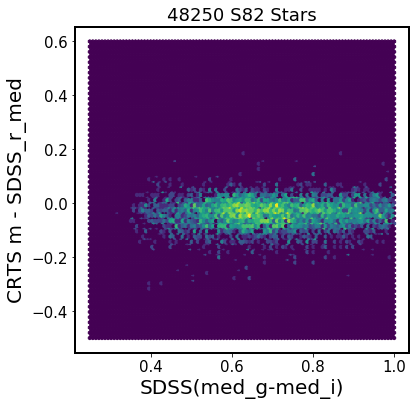

In [558]:
# if I select only blue stars, it may 
# better work with quasars ...
gi = sdss_crts['g_mMed']-sdss_crts['i_mMed']
mr = sdss_crts['raw_mean_mag']-sdss_crts['r_mMed']
m1 = (-1<gi)*(gi<1)  # this selects blue stars 
m2 = (-1 < mr)*(mr < 1)   # this trims the outliers 
m = m1*m2 
fig,ax = plt.subplots(1,1,figsize=(6,6))
x = gi[m]
y = mr[m]
ax.hexbin(x,y,  extent= (0.25,1, -0.5,0.6), bins='log', vmin=0.6 , 
             )
ax.set_xlabel('SDSS(med_g-med_i)')
ax.set_ylabel('CRTS m - SDSS_r_med')
ax.set_title('48250 S82 Stars')
plt.savefig('SDSSg-i_vs_CRTS-SDSSr_limit_gi.png', bbox_inches='tight')

[ 0.05227326 -0.10419904]


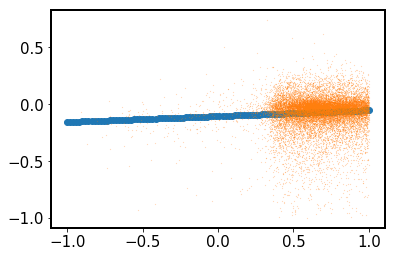

In [559]:
# p(x) = p[0] * x**deg + ... + p[deg]
p = np.polyfit(x, y, deg=1)
x_ = np.linspace(-1,1.0,100)
plt.scatter(x_, p[0]*x_ + p[1])
plt.scatter(x,y, s=0.01)
print(p)

In [575]:
x = sdss_crts['g_mMed']-sdss_crts['i_mMed']
sdss_crts['SDSS_r_synth'] = sdss_crts['raw_mean_mag'] - ( p[0]*x  + p[1] )
p_crts = p

See how well it works :  plot the CRTS-derived SDSS synthetic r vs SDSS true r : 

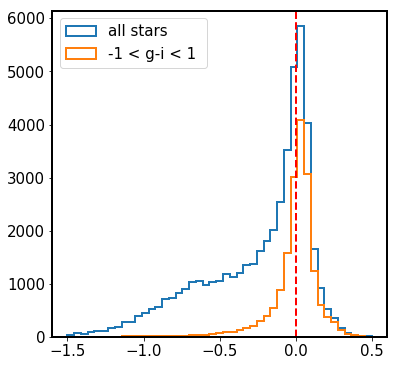

In [574]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.hist(sdss_crts['SDSS_r_synth'] - sdss_crts['r_mMed'], histtype = 'step',
        lw=2, bins=45, range = (-1.5,0.5), label='all stars ')
m = (-1 < x) * (x<1)
ax.hist(sdss_crts['SDSS_r_synth'][m] - sdss_crts['r_mMed'][m], histtype = 'step',
        lw=2, bins=45, range = (-1.5,0.5), label='-1 < g-i < 1 ')
ax.legend(loc='upper left', fontsize=15)
ax.axvline(0, ls='--', lw=2, c='r')
plt.savefig('CRTS_SDSS_compare_synth_mag.png', bbox_inches='tight')

Well there's much larger difference , because perhaps CRTS white light  is not as close to r as to g  ? ...

### Finding the photometric correction : PTF <a id='sdss-ptf'></a>

In [181]:
# select only 48250 SDSS stars that were cross-matched 
ptf_stars.rename_column('ra','raSDSS')
ptf_stars.rename_column('dec','decSDSS')

In [182]:
# add the info on SDSS stars to be able to plot the colors ...

# cross-match with the sdss_crts table to get the sdss info .... 
ptf_stars['raSDSS']

cntr_01,dist_x,pang_x,ra_01,dec_01,major_01,raSDSS,decSDSS,oid,fid,astrometricrms,bestastrometricrms,bestchisq,bestcon,bestlineartrend,bestmagrms,bestmaxmag,bestmaxslope,bestmeanmag,bestmedianabsdev,bestmedianmag,bestminmag,bestweightedmagrms,bestweightedmeanmag,chisq,magrms,maxmag,meanmag,medianabsdev,medianmag,minmag,nbestobs,ngoodobs,nobs,weightedmagrms,weightedmeanmag
,arcsec,deg,,,,degrees,degrees,,,degrees,degrees,,,mag / d,mag,mag,mag / d,mag,mag,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,,,,mag,mag
int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64
1,0.151884,-5.439809,311.0213,-0.79702,0.1,311.021296,-0.796978,26822040004748,2,1.457393e-06,1.457393e-06,2.505,1.0,-0.0008748668,0.238,20.862,0.112,20.559,0.137,20.573,20.158,0.229,20.501,2.253,0.222,20.862,20.581,0.161,20.573,20.158,9,13,13,0.22,20.537
2,0.084732,-77.734936,58.42855,0.4,0.1,58.428527,0.400005,27142060001391,2,2.946434e-07,2.946434e-07,0.867,1.0,7.029788e-06,0.011,16.095,0.156,16.073,0.007,16.075,16.055,0.01,16.072,1.008,0.023,16.182,16.077,0.007,16.075,16.054,19,29,29,0.011,16.073
3,0.029023,119.745833,325.76031,-0.50307,0.1,325.760317,-0.503074,226871060004189,1,3.408907e-07,3.408907e-07,1.533,1.0,0.0001941454,0.023,18.097,1.896,18.021,0.012,18.018,17.977,0.021,18.018,1.805,0.074,18.638,18.024,0.014,18.016,17.9,68,85,85,0.023,18.017
4,0.025455,-135.001369,2.78239,0.56016,0.1,2.782385,0.560155,225922040004343,2,1.745423e-07,1.745423e-07,1.521,1.0,0.0002469725,0.024,17.939,1.577,17.883,0.016,17.885,17.815,0.023,17.882,1.369,0.025,17.94,17.883,0.016,17.884,17.815,65,82,129,0.023,17.882
5,0.0709,-66.033447,310.31421,1.12006,0.1,310.314192,1.120068,1002212020002896,2,7.402454e-07,7.402454e-07,3.336,1.0,-7.173329e-05,0.155,19.838,18.155,19.427,0.08,19.425,18.915,0.134,19.413,3.518,0.163,19.838,19.431,0.081,19.428,18.915,143,148,148,0.138,19.416
6,0.147579,102.68224,52.97938,-0.99659,0.1,52.97942,-0.996599,26071025000574,1,2.46741e-06,2.46741e-06,3.292,1.0,0.05257742,0.313,21.558,270.151,21.173,0.215,21.165,20.804,0.295,21.202,3.292,0.313,21.558,21.173,0.215,21.165,20.804,4,4,4,0.295,21.202
7,0.140211,150.805356,358.42715,0.87455,0.1,358.427169,0.874516,28012090004710,2,1.102988e-06,1.102988e-06,1.406,1.0,1.967853e-05,0.133,20.52,7.384,20.206,0.084,20.225,19.927,0.115,20.206,2.149,0.173,20.754,20.207,0.093,20.221,19.784,28,35,35,0.144,20.196
8,0.051164,39.287274,309.23932,0.70623,0.1,309.239329,0.706241,1002212060016235,2,7.30565e-07,7.30565e-07,1.93,1.0,1.364332e-05,0.044,18.271,3.179,18.157,0.024,18.158,17.974,0.037,18.154,1.947,0.044,18.271,18.158,0.024,18.16,17.974,124,128,133,0.037,18.155


In [185]:
sdss_crts = Table.read('/Users/chris/GradResearch/CRTS_PROJECT/data_products/\
CRTS_SDSS_combined_stars_catalog.dat', format='ascii')

# match ptf_stars  to sdss_s
sdss = sdss_crts[['ra_sdss', 'dec_sdss','raRMS',  'decRMS', 'nEpochs','AR_val', 'u_Nobs',
 'u_mMed', 'u_mMean', 'u_mErr', 'u_rms_scatt', 'u_chi2', 'g_Nobs', 'g_mMed', 'g_mMean',
 'g_mErr', 'g_rms_scatt', 'g_chi2', 'r_Nobs', 'r_mMed', 'r_mMean', 'r_mErr', 
 'r_rms_scatt', 'r_chi2', 'i_Nobs', 'i_mMed', 'i_mMean',  'i_mErr', 'i_rms_scatt', 
 'i_chi2', 'z_Nobs', 'z_mMed', 'z_mMean', 'z_mErr', 'z_rms_scatt', 'z_chi2']]


In [202]:
ptf_coords = SkyCoord(ra=ptf_stars['raSDSS'].data.data*u.degree, 
                     dec= ptf_stars['decSDSS'].data.data*u.degree)
sdss_coords = SkyCoord(ra=sdss['ra_sdss'].data.data*u.degree, 
                        dec=sdss['dec_sdss'].data.data*u.degree)
idx, sep2d, dist3d = ptf_coords.match_to_catalog_sky(sdss_coords) 

ptf_stars['d2d_arcsec']=sep2d.value*3600

sdss_ptf = hstack([ptf_stars,  sdss[idx]])


In [208]:
sdss_ptf[:4]

cntr_01,dist_x,pang_x,ra_01,dec_01,major_01,raSDSS,decSDSS,oid,fid,astrometricrms,bestastrometricrms,bestchisq,bestcon,bestlineartrend,bestmagrms,bestmaxmag,bestmaxslope,bestmeanmag,bestmedianabsdev,bestmedianmag,bestminmag,bestweightedmagrms,bestweightedmeanmag,chisq,magrms,maxmag,meanmag,medianabsdev,medianmag,minmag,nbestobs,ngoodobs,nobs,weightedmagrms,weightedmeanmag,d2d_arcsec,ra_sdss,dec_sdss,raRMS,decRMS,nEpochs,AR_val,u_Nobs,u_mMed,u_mMean,u_mErr,u_rms_scatt,u_chi2,g_Nobs,g_mMed,g_mMean,g_mErr,g_rms_scatt,g_chi2,r_Nobs,r_mMed,r_mMean,r_mErr,r_rms_scatt,r_chi2,i_Nobs,i_mMed,i_mMean,i_mErr,i_rms_scatt,i_chi2,z_Nobs,z_mMed,z_mMean,z_mErr,z_rms_scatt,z_chi2
,arcsec,deg,,,,degrees,degrees,,,degrees,degrees,,,mag / d,mag,mag,mag / d,mag,mag,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,,,,mag,mag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
1,0.151884,-5.439809,311.0213,-0.79702,0.1,311.021296,-0.796978,26822040004748,2,1.457393e-06,1.457393e-06,2.505,1.0,-0.0008748668,0.238,20.862,0.112,20.559,0.137,20.573,20.158,0.229,20.501,2.253,0.222,20.862,20.581,0.161,20.573,20.158,9,13,13,0.22,20.537,0.14882787361,311.0213013,-0.797019,0.047,0.092,4,0.182,0,0.465,0.465,0.0,0.0,0.0,4,22.49,22.411,0.056,0.136,1.5,4,21.068,21.078,0.025,0.04,0.5,4,19.927,19.919,0.014,0.022,0.5,4,19.349,19.35,0.03,0.041,0.3
2,0.084732,-77.734936,58.42855,0.4,0.1,58.428527,0.400005,27142060001391,2,2.946434e-07,2.946434e-07,0.867,1.0,7.029788e-06,0.011,16.095,0.156,16.073,0.007,16.075,16.055,0.01,16.072,1.008,0.023,16.182,16.077,0.007,16.075,16.054,19,29,29,0.011,16.073,0.087196029767,58.4285507,0.4,0.026,0.048,14,1.004,13,18.355,18.36,0.006,0.043,3.0,13,16.886,16.891,0.004,0.016,1.2,13,16.174,16.175,0.004,0.015,1.5,13,15.848,15.851,0.004,0.015,1.1,13,15.645,15.643,0.005,0.014,0.6
3,0.029023,119.745833,325.76031,-0.50307,0.1,325.760317,-0.503074,226871060004189,1,3.408907e-07,3.408907e-07,1.533,1.0,0.0001941454,0.023,18.097,1.896,18.021,0.012,18.018,17.977,0.021,18.018,1.805,0.074,18.638,18.024,0.014,18.016,17.9,68,85,85,0.023,18.017,0.0104397888776,325.7603149,-0.503072,0.019,0.04,10,0.137,9,19.545,19.54,0.012,0.041,1.2,9,18.101,18.1,0.005,0.007,0.2,9,17.473,17.468,0.005,0.027,2.4,9,17.205,17.204,0.005,0.008,0.2,9,17.057,17.058,0.006,0.014,0.4
4,0.025455,-135.001369,2.78239,0.56016,0.1,2.782385,0.560155,225922040004343,2,1.745423e-07,1.745423e-07,1.521,1.0,0.0002469725,0.024,17.939,1.577,17.883,0.016,17.885,17.815,0.023,17.882,1.369,0.025,17.94,17.883,0.016,17.884,17.815,65,82,129,0.023,17.882,0.0163230904138,2.7823884,0.560158,0.024,0.019,8,0.073,8,21.786,21.775,0.054,0.23,1.5,8,19.337,19.341,0.007,0.027,2.1,8,18.018,18.019,0.006,0.012,0.3,8,17.42,17.417,0.006,0.019,1.0,8,17.08,17.079,0.006,0.017,1.1


In [215]:
ax.hexbin?

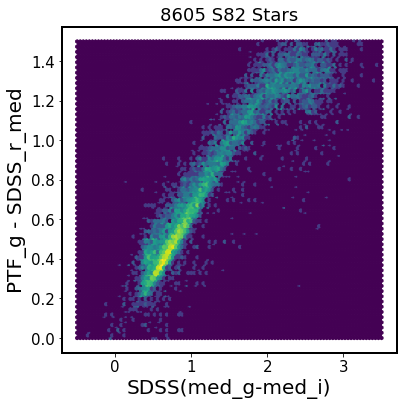

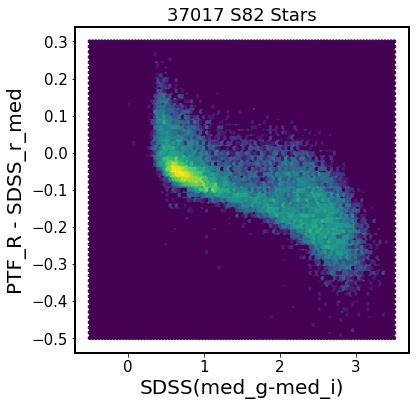

In [222]:
f = 'g'; i = 1 
m = sdss_ptf['fid'] == i
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.hexbin(sdss_ptf['g_mMed'][m]-sdss_ptf['i_mMed'][m],
           sdss_ptf['bestmedianmag'][m]-sdss_ptf['r_mMed'][m],
           extent= (-0.5,3.5, 0,1.5), bins='log'
             )
ax.set_xlabel('SDSS(med_g-med_i)')
ax.set_ylabel('PTF_'+f+' - SDSS_r_med')
ax.set_title(str(np.sum(m))+' S82 Stars')
plt.savefig('SDSSg-i_vs_PTFg-SDSSr.png', bbox_inches='tight')

f = 'R'; i = 2
m = sdss_ptf['fid'] == i
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.hexbin(sdss_ptf['g_mMed'][m]-sdss_ptf['i_mMed'][m],
           sdss_ptf['bestmedianmag'][m]-sdss_ptf['r_mMed'][m],
           extent= (-0.5,3.5, -0.5,0.3), bins='log', vmin=0.5
             )
ax.set_xlabel('SDSS(med_g-med_i)')
ax.set_ylabel('PTF_'+f+' - SDSS_r_med')
ax.set_title(str(np.sum(m))+' S82 Stars')
plt.savefig('SDSSg-i_vs_PTFR-SDSSr.png', bbox_inches='tight')

Limit to blue stars, derive the corrections to SDSS_r_synthetic : 

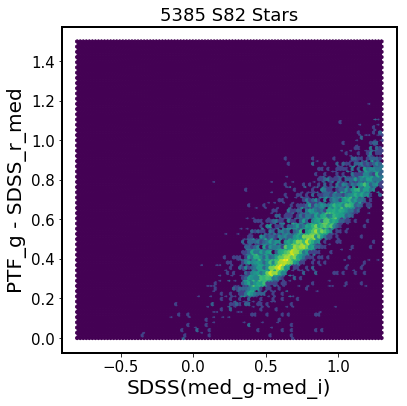

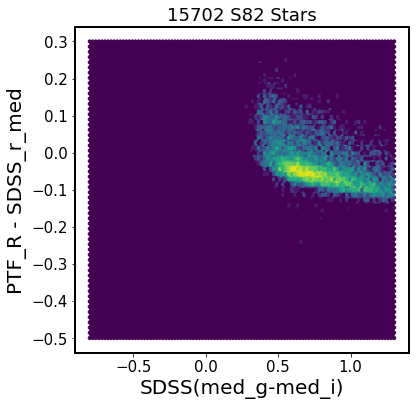

In [498]:
f = 'g'; i = 1 
m1 = sdss_ptf['fid'] == i
gi = sdss_ptf['g_mMed'] - sdss_ptf['i_mMed']
m2 = (-1 < gi) * (gi < 1.3 )
m = m1*m2

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.hexbin(gi[m],
           sdss_ptf['bestmedianmag'][m]-sdss_ptf['r_mMed'][m],
           extent= (-0.8,1.3, 0,1.5), bins='log'
             )
ax.set_xlabel('SDSS(med_g-med_i)')
ax.set_ylabel('PTF_'+f+' - SDSS_r_med')
ax.set_title(str(np.sum(m))+' S82 Stars')
plt.savefig('SDSSg-i_vs_PTFg-SDSSr_limit.png', bbox_inches='tight')

f = 'R'; i = 2
m1 = sdss_ptf['fid'] == i
m = m1*m2
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.hexbin(gi[m],
           sdss_ptf['bestmedianmag'][m]-sdss_ptf['r_mMed'][m],
           extent= (-0.8,1.3, -0.5,0.3), bins='log', vmin=0.5
             )
ax.set_xlabel('SDSS(med_g-med_i)')
ax.set_ylabel('PTF_'+f+' - SDSS_r_med')
ax.set_title(str(np.sum(m))+' S82 Stars')
plt.savefig('SDSSg-i_vs_PTFR-SDSSr_limit.png', bbox_inches='tight')

[ 0.06951195  0.48170841  0.08340501]


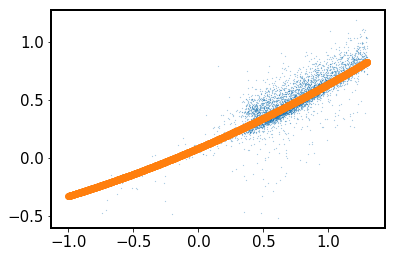

In [508]:
ptf_to_sdss_r = {}
i=1  # PTF g 
m1 = sdss_ptf['fid'] == i
gi = sdss_ptf['g_mMed'] - sdss_ptf['i_mMed']
m2 = (-1 < gi) * (gi < 1.3 )
m = m1*m2
x = gi[m]
y = sdss_ptf['bestmedianmag'][m]-sdss_ptf['r_mMed'][m]
plt.scatter(x,y, s=0.02)
p = np.polyfit(x,y,deg=2)
x_ = np.linspace(-1,1.3,  1000)
plt.scatter(x_, p[0]*x_*x_ + p[1]*x_ + p[2])
print(p)
ptf_to_sdss_r['g'] = p

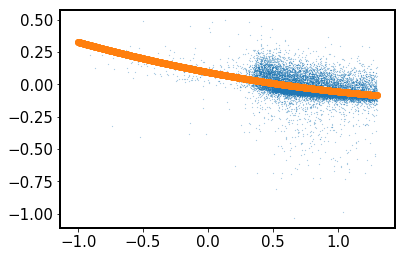

In [509]:
i=2 # PTF R 
m1 = sdss_ptf['fid'] == i
gi = sdss_ptf['g_mMed'] - sdss_ptf['i_mMed']
m2 = (-1 < gi) * (gi < 1.3 )
m = m1*m2
x = gi[m]
y = sdss_ptf['bestmedianmag'][m]-sdss_ptf['r_mMed'][m]
plt.scatter(x,y, s=0.02)
p = np.polyfit(x,y,deg=2)
x_ = np.linspace(-1,1.3,  1000)
plt.scatter(x_, p[0]*x_*x_ + p[1]*x_ + p[2])
ptf_to_sdss_r['R'] = p

In [510]:
# Apply MY  corrections: all to SDSS_r_
sdss_ptf['synth_sdss_r_mag'] = 99.99
x = sdss_ptf['g_mMed']-sdss_ptf['i_mMed']

# PTF,g,R --> SDSS,r
m = sdss_ptf['fid'] == 1
p = ptf_to_sdss_r['g']
sdss_ptf['synth_sdss_r_mag'][m] = sdss_ptf['bestmedianmag'][m] - (p[0]*x[m]*x[m] + \
                                                    p[1]*x[m]+ p[2])
m = sdss_ptf['fid'] == 2
p = ptf_to_sdss_r['R']
sdss_ptf['synth_sdss_r_mag'][m] = sdss_ptf['bestmedianmag'][m] - (p[0]*x[m]*x[m] + \
                                                    p[1]*x[m]+ p[2])

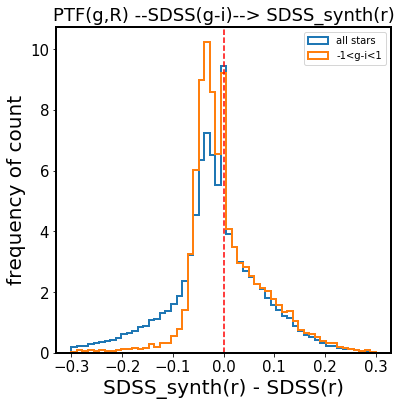

In [541]:
# Plot how well MY corrections work ... 
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.hist(sdss_ptf['synth_sdss_r_mag']-  sdss_ptf['r_mMed'], bins=55,
           range = (-0.3,0.3), histtype='step', normed=True,
           lw=2, label='all stars')

gi = sdss_ptf['g_mMed']-sdss_ptf['i_mMed']
m = (-1 < gi) * (gi < 1 )
ax.hist(sdss_ptf['synth_sdss_r_mag'][m]-  sdss_ptf['r_mMed'][m], bins=55,
           range = (-0.3,0.3), histtype='step', normed=True,
           lw=2, label='-1<g-i<1')

ax.axvline(0, ls='--', c='red')
plt.legend()
ax.set_xlabel('SDSS_synth(r) - SDSS(r)')
ax.set_title('PTF(g,R) --SDSS(g-i)--> SDSS_synth(r)')
ax.set_ylabel('frequency of count')
plt.savefig('PTF_SDSS_synthetic_rmag.png', bbox_inches='tight')

It looks very similar to the correction derived by Ofek+2011, which I think is a good sign - this means that overall , I can bring all PTF(g,R) to SDSS(r) filter , given mean SDSS(g-i) per object . He must have fitted a simple polynomial, just like Ofek did. 

In [228]:
# Apply corrections from Ofek+2011
sdss_ptf['synth_sdss_mag'] = 99.99
sdss_ptf['synth_sdss_filter'] = 'x'
sdss_ptf['synth_sdss_mag'] = sdss_ptf['synth_sdss_mag'].astype(float)

# convert PTF to SDSS synthetic filters...
# g : '1', R : '2'
alpha_c = {'1':0.09, '2':0.212, }
sdss_col = {'1': gr_SDSS,  '2':ri_SDSS}
grSDSS = sdss_ptf['g_mMed']-sdss_ptf['r_mMed']
riSDSS = sdss_ptf['r_mMed']-sdss_ptf['i_mMed']


# PTF,g --> SDSS,g
m = sdss_ptf['fid'] == 1
sdss_ptf['synth_sdss_filter'][m] = 'g'
sdss_ptf['synth_sdss_mag'][m] = sdss_ptf['bestmedianmag'][m] + 0.09 * grSDSS[m]

# PTF,R --> SDSS,r
m = sdss_ptf['fid'] == 2
sdss_ptf['synth_sdss_filter'][m] = 'r'
sdss_ptf['synth_sdss_mag'][m] = sdss_ptf['bestmedianmag'][m] + 0.212 * riSDSS[m]

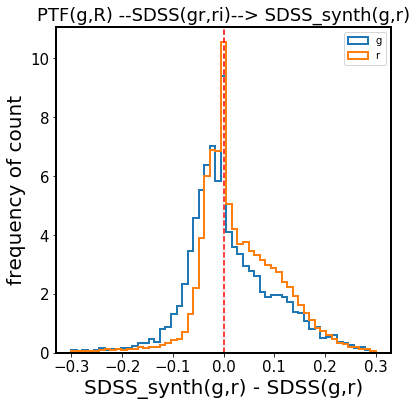

In [512]:
# Plot how well Ofek's corrections work 
fig,ax = plt.subplots(1,1,figsize=(6,6))
for f in 'gr':
    m = sdss_ptf['synth_sdss_filter'] == f
    ax.hist(sdss_ptf['synth_sdss_mag'][m] -  sdss_ptf[f+'_mMed'][m], bins=55,
           range = (-0.3,0.3), histtype='step', normed=True,
           lw=2, label=f)
ax.axvline(0, ls='--', c='red')
plt.legend()
ax.set_xlabel('SDSS_synth(g,r) - SDSS(g,r)')
ax.set_title('PTF(g,R) --SDSS(gr,ri)--> SDSS_synth(g,r)')
ax.set_ylabel('frequency of count')
plt.savefig('PTF_SDSS_synthetic_mag_compare.png', bbox_inches='tight')

### Finding the photometric correction : PS1 ( vs Tonry+2012) <a id='sdss-ps1'></a>

We used the 5% of the randomly chosen SDSS Standard Stars catalog for which Branimir provided CRTS light curves for Paper1... 

In [7]:
# Read the SDSS stars for which we have CRTS data : 48250 stars 
sdss_crts = Table.read('/Users/chris/GradResearch/CRTS_PROJECT/data_products/\
CRTS_SDSS_combined_stars_catalog.dat', format='ascii')

# select only relevant cols ... 
sdss = sdss_crts[['ra_sdss', 'dec_sdss','raRMS',  'decRMS', 'nEpochs','AR_val', 'u_Nobs',
 'u_mMed', 'u_mMean', 'u_mErr', 'u_rms_scatt', 'u_chi2', 'g_Nobs', 'g_mMed', 'g_mMean',
 'g_mErr', 'g_rms_scatt', 'g_chi2', 'r_Nobs', 'r_mMed', 'r_mMean', 'r_mErr', 
 'r_rms_scatt', 'r_chi2', 'i_Nobs', 'i_mMed', 'i_mMean',  'i_mErr', 'i_rms_scatt', 
 'i_chi2', 'z_Nobs', 'z_mMed', 'z_mMean', 'z_mErr', 'z_rms_scatt', 'z_chi2']]


# Read the CASjobs result of querying PS1 against the 48250 SDSS stars 
# 
ps1_stars = Table.read('PS1_S82_suberlak.csv', format='ascii')
ps1_stars.rename_column('ra', 'raSDSS')
ps1_stars.rename_column('dec', 'decSDSS')


In [9]:
sdss

ra_sdss,dec_sdss,raRMS,decRMS,nEpochs,AR_val,u_Nobs,u_mMed,u_mMean,u_mErr,u_rms_scatt,u_chi2,g_Nobs,g_mMed,g_mMean,g_mErr,g_rms_scatt,g_chi2,r_Nobs,r_mMed,r_mMean,r_mErr,r_rms_scatt,r_chi2,i_Nobs,i_mMed,i_mMean,i_mErr,i_rms_scatt,i_chi2,z_Nobs,z_mMed,z_mMean,z_mErr,z_rms_scatt,z_chi2
float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
0.040063,0.55537,0.038,0.031,9,0.068,9,19.069,19.062,0.009,0.047,2.0,9,18.253,18.251,0.007,0.016,0.6,9,17.919,17.919,0.006,0.014,0.6,9,17.788,17.79,0.006,0.01,0.2,9,17.731,17.734,0.008,0.02,0.7
0.054511,-1.1499029,0.049,0.067,9,0.097,9,17.772,17.77,0.007,0.018,0.7,9,16.012,16.01,0.006,0.014,0.5,9,15.319,15.318,0.006,0.01,0.3,9,15.056,15.057,0.005,0.013,0.5,9,14.938,14.942,0.006,0.016,0.9
0.073721,0.404988,0.058,0.057,14,0.071,2,22.361,22.358,0.181,0.127,0.2,13,19.855,19.857,0.007,0.033,1.6,13,18.325,18.322,0.005,0.024,1.0,13,17.166,17.171,0.004,0.016,1.1,13,16.54,16.543,0.005,0.024,1.2
0.078358,0.235094,0.032,0.036,13,0.085,0,-0.33,-0.33,0.0,0.0,0.0,12,20.936,20.937,0.011,0.03,0.5,12,19.601,19.602,0.007,0.033,1.8,12,18.961,18.971,0.006,0.023,1.6,12,18.615,18.601,0.013,0.066,2.1
0.093134,0.751608,0.032,0.021,5,0.077,5,16.393,16.385,0.007,0.028,1.8,5,15.192,15.192,0.006,0.005,0.1,5,14.798,14.808,0.008,0.03,2.8,5,14.667,14.666,0.008,0.023,0.9,5,14.647,14.645,0.009,0.006,0.1
0.100371,1.1440089,0.044,0.034,13,0.08,10,22.084,22.054,0.08,0.251,1.1,12,20.204,20.197,0.009,0.042,2.0,12,19.206,19.204,0.006,0.023,1.1,12,18.782,18.779,0.006,0.026,1.5,12,18.541,18.537,0.011,0.041,1.0
0.100521,0.309938,0.08,0.055,12,0.078,0,-0.36,-0.36,0.0,0.0,0.0,11,22.595,22.573,0.038,0.092,0.5,11,21.211,21.209,0.017,0.07,1.3,11,20.296,20.291,0.012,0.037,0.9,11,19.736,19.755,0.031,0.113,1.2
0.110501,1.2332392,0.049,0.035,13,0.075,12,19.65,19.645,0.012,0.045,1.0,12,18.431,18.429,0.006,0.018,0.7,12,17.956,17.956,0.005,0.019,0.9,12,17.796,17.796,0.005,0.014,0.7,12,17.74,17.733,0.008,0.03,1.2
0.115436,0.686838,0.038,0.048,13,0.078,12,21.657,21.618,0.044,0.194,1.0,12,19.21,19.212,0.006,0.023,0.8,12,17.821,17.821,0.006,0.015,0.5,12,16.561,16.562,0.004,0.015,0.8,12,15.879,15.878,0.005,0.016,0.7


In [13]:
ps1_stars

raSDSS,decSDSS,objID,raMean,decMean,nDetections,ng,nr,ni,nz,ny,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag
float64,float64,int64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64
2.7035041,-1.2650509,106480027035232374,2.70360192,-1.26507689,77,11,21,19,12,14,19.7117996216,18.4804992676,17.1317996979,16.5146999359,16.2192001343
4.784122,-1.26297,106480047839824905,4.78414267,-1.26297807,95,11,35,18,16,15,17.5862007141,16.7828998566,16.4740009308,16.3316993713,16.2541999817
4.784122,-1.26297,106480047843455031,4.78440284,-1.26290644,3,0,1,0,0,2,-999.0,19.9277000427,-999.0,-999.0,19.2154006958
6.2023568,-1.26136,106480062023836824,6.20236283,-1.26138872,84,13,36,17,8,10,20.3444004059,20.1261997223,19.9895000458,20.0781002045,19.8502998352
45.7741966,-1.2442,106500457741987461,45.77418525,-1.24420805,80,10,17,24,14,15,19.757900238,18.5743999481,17.2534008026,16.6376991272,16.3528003693
6.549521,-1.2613474,106480065494846808,6.54949894,-1.26137515,81,11,31,13,12,14,18.2938995361,17.060300827,16.0280990601,15.5728998184,15.3549995422
6.6219454,-1.264987,106480066219572457,6.6219708,-1.26499633,83,7,32,16,13,15,21.7982006073,20.6399993896,20.0853004456,19.8216991425,19.5580005646
7.8339,-1.260534,106480078339187806,7.83394435,-1.26054102,78,8,32,19,8,11,21.5478000641,20.098400116,19.242099762,18.8526000977,18.6466007233
9.3800373,-1.26528,106480093799892111,9.38006199,-1.26530316,44,10,18,9,6,1,20.8983001709,20.6812000275,20.6502990723,20.7919006348,20.0986995697


Since the PS1 catalog is the result of querying with these SDSS ra,dec ,  each PS1 here definitely has a 'perfect' SDSS match (i.e. each PS1 object here is a best match) 

In [14]:
## match PS1 catalog  to SDSS stars 
ps1_coords = SkyCoord(ra=ps1_stars['raSDSS'].data.data*u.degree, 
                     dec= ps1_stars['decSDSS'].data.data*u.degree)
sdss_coords = SkyCoord(ra=sdss['ra_sdss'].data.data*u.degree, 
                        dec=sdss['dec_sdss'].data.data*u.degree)

# match SDSS to PS1 , because SDSS here has 48250 vs 53000 rows ... 
# I think CASJobs returned more than one match per SDSS object .... 
idx, sep2d, dist3d = sdss_coords.match_to_catalog_sky(ps1_coords) 

sdss['d2d_arcsec']=sep2d.value*3600

sdss_ps1 = hstack([sdss, ps1_stars[idx] ])


In [16]:
sdss_ps1

ra_sdss,dec_sdss,raRMS,decRMS,nEpochs,AR_val,u_Nobs,u_mMed,u_mMean,u_mErr,u_rms_scatt,u_chi2,g_Nobs,g_mMed,g_mMean,g_mErr,g_rms_scatt,g_chi2,r_Nobs,r_mMed,r_mMean,r_mErr,r_rms_scatt,r_chi2,i_Nobs,i_mMed,i_mMean,i_mErr,i_rms_scatt,i_chi2,z_Nobs,z_mMed,z_mMean,z_mErr,z_rms_scatt,z_chi2,d2d_arcsec,raSDSS,decSDSS,objID,raMean,decMean,nDetections,ng,nr,ni,nz,ny,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag
float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64
0.040063,0.55537,0.038,0.031,9,0.068,9,19.069,19.062,0.009,0.047,2.0,9,18.253,18.251,0.007,0.016,0.6,9,17.919,17.919,0.006,0.014,0.6,9,17.788,17.79,0.006,0.01,0.2,9,17.731,17.734,0.008,0.02,0.7,0.0,0.040063,0.55537,108660000401136802,0.04012087,0.55527302,79,12,20,24,11,12,18.2329998016,17.9456996918,17.8281002045,17.798500061,17.7858009338
0.054511,-1.1499029,0.049,0.067,9,0.097,9,17.772,17.77,0.007,0.018,0.7,9,16.012,16.01,0.006,0.014,0.5,9,15.319,15.318,0.006,0.01,0.3,9,15.056,15.057,0.005,0.013,0.5,9,14.938,14.942,0.006,0.016,0.9,0.0,0.054511,-1.1499029,106620000545480580,0.05450671,-1.14991365,91,12,26,29,10,14,15.8919000626,15.2995004654,15.0699996948,14.9767999649,14.882900238
0.073721,0.404988,0.058,0.057,14,0.071,2,22.361,22.358,0.181,0.127,0.2,13,19.855,19.857,0.007,0.033,1.6,13,18.325,18.322,0.005,0.024,1.0,13,17.166,17.171,0.004,0.016,1.1,13,16.54,16.543,0.005,0.024,1.2,0.0,0.073721,0.404988,108480000736626486,0.07361949,0.40507637,69,12,14,23,10,10,19.6247005463,18.3346996307,17.1863994598,16.6585006714,16.396900177
0.078358,0.235094,0.032,0.036,13,0.085,0,-0.33,-0.33,0.0,0.0,0.0,12,20.936,20.937,0.011,0.03,0.5,12,19.601,19.602,0.007,0.033,1.8,12,18.961,18.971,0.006,0.023,1.6,12,18.615,18.601,0.013,0.066,2.1,0.0,0.078358,0.235094,108280000783302529,0.07834744,0.23504445,82,10,22,25,12,13,20.7171001434,19.6212997437,18.9897003174,18.7287006378,18.5344009399
0.093134,0.751608,0.032,0.021,5,0.077,5,16.393,16.385,0.007,0.028,1.8,5,15.192,15.192,0.006,0.005,0.1,5,14.798,14.808,0.008,0.03,2.8,5,14.667,14.666,0.008,0.023,0.9,5,14.647,14.645,0.009,0.006,0.1,0.0,0.093134,0.751608,108900000931322354,0.0931247,0.75158327,81,10,28,19,9,15,15.163599968,14.8111000061,14.7030000687,14.6808996201,14.6504001617
0.100371,1.1440089,0.044,0.034,13,0.08,10,22.084,22.054,0.08,0.251,1.1,12,20.204,20.197,0.009,0.042,2.0,12,19.206,19.204,0.006,0.023,1.1,12,18.782,18.779,0.006,0.026,1.5,12,18.541,18.537,0.011,0.041,1.0,0.0,0.100371,1.1440089,109370001003733209,0.10037719,1.14390159,78,9,28,21,8,12,20.0734004974,19.2198009491,18.790599823,18.6217002869,18.4771003723
0.100521,0.309938,0.08,0.055,12,0.078,0,-0.36,-0.36,0.0,0.0,0.0,11,22.595,22.573,0.038,0.092,0.5,11,21.211,21.209,0.017,0.07,1.3,11,20.296,20.291,0.012,0.037,0.9,11,19.736,19.755,0.031,0.113,1.2,0.0,0.100521,0.309938,108370001005922425,0.10056796,0.30994208,58,3,17,22,7,9,22.260799408,21.1905002594,20.3353996277,19.9172992706,19.5834999084
0.110501,1.2332392,0.049,0.035,13,0.075,12,19.65,19.645,0.012,0.045,1.0,12,18.431,18.429,0.006,0.018,0.7,12,17.956,17.956,0.005,0.019,0.9,12,17.796,17.796,0.005,0.014,0.7,12,17.74,17.733,0.008,0.03,1.2,0.0,0.110501,1.2332392,109480001105390977,0.11050821,1.23358117,2,0,0,2,0,0,-999.0,-999.0,19.5312995911,-999.0,-999.0
0.115436,0.686838,0.038,0.048,13,0.078,12,21.657,21.618,0.044,0.194,1.0,12,19.21,19.212,0.006,0.023,0.8,12,17.821,17.821,0.006,0.015,0.5,12,16.561,16.562,0.004,0.015,0.8,12,15.879,15.878,0.005,0.016,0.7,0.0,0.115436,0.686838,108820001154584630,0.11543547,0.68680923,65,10,20,21,7,7,19.0009002686,17.8239002228,16.5673999786,15.9772996902,15.6923999786


#### Plot the PS1 vs SDSS colors ... 

In [54]:
tonry[0]['B_1']

-0.13900000000000001

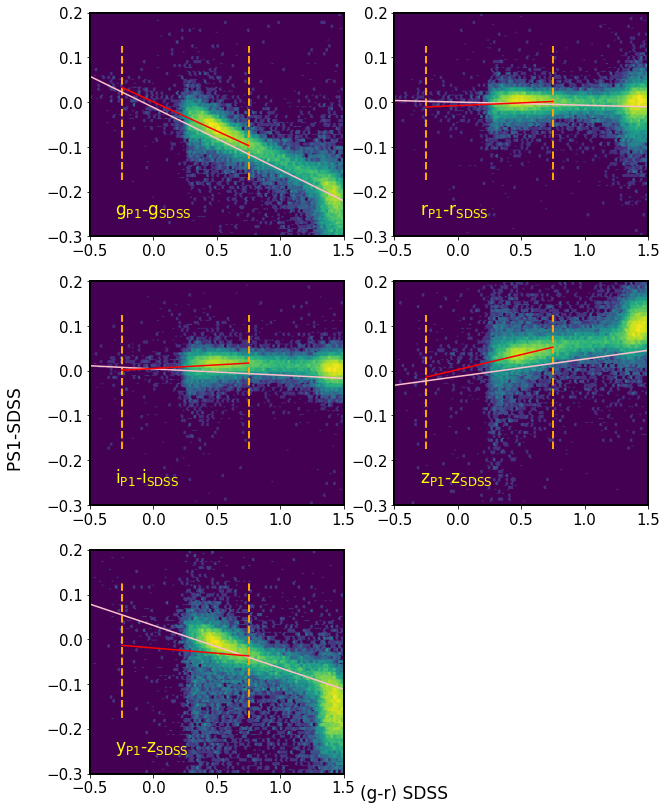

In [63]:

# First plot 
## SDSS(g-r) vs PS1(g)-SDSS(g) ,
## SDSS(g-r) vs PS1(r)-SDSS(r) 
## SDSS(g-r) vs PS1(i)-SDSS(i) 
## SDSS(g-r) vs PS1(z)-SDSS(z) 
## SDSS(g-r) vs PS1(y)-SDSS(z) 

# since these are the colors used in Tonry_2012 Table 6
%matplotlib inline 
x = sdss_ps1['g_mMed'] - sdss_ps1['r_mMed']  # SDSS (g-r)
ymin = {'g':-0.3,'r':-0.3,'i':-0.3,'z':-0.3,'y':-0.3}
ymax = {'g':0.2,'r':0.2, 'i':0.2, 'z':0.2,   'y':0.2}

# mark the limit for SDSS S82 quasars : 1 dex in color spac
grmin = -0.25
grmax = 0.75 

fig,axs = plt.subplots(3,2, figsize=(10,14))
ax = np.ravel(axs)
i = 0 
for f1,f2 in zip('grizy', 'grizz'):
    m1 = sdss_ps1[f1+'MeanPSFMag'] > 0
    y = sdss_ps1[f1+'MeanPSFMag'] - sdss_ps1[f2+'_mMed']  # fPS1 - fSDSS
    
    # remove stars that have no obs in that filter 
    ax[i].hexbin(x[m1],y[m1], extent= (-0.5,1.5, ymin[f1],ymax[f1]), bins='log'
                 )
    ax[i].text(x = 0.1, y=0.1, s = f1+r'$_{\mathrm{P1}}$'+'-'+f2+r'$_{\mathrm{SDSS}}$', 
           color='yellow', fontsize=17, transform=ax[i].transAxes)
    
    # mark with vertical lines  the range occupied by QSO
    # the y limits are in axis coords 
    ax[i].axvline(grmin, ymin=0.25, ymax=0.85 , ls='--', lw=2, c='orange')
    ax[i].axvline(grmax, ymin=0.25, ymax=0.85, ls='--', lw=2, c='orange')
    
    # plot Tonry's linear fits 
    # i-th row because we also iterate over  grizy_P1 
    xt = np.linspace(-0.5,1.5,100)
    yt = tonry[i]['B_0'] + tonry[i]['B_1'] * xt
    ax[i].plot(xt,yt, c='pink')
    
     # plot Tonry's quadratic fits 
    # i-th row because we also iterate over  grizy_P1 
    #xt = np.linspace(-0.5,1.5,100)
    #yt = tonry[i]['A_0'] + tonry[i]['A_1'] * xt + tonry[i]['A_1'] * xt * xt
    #ax[i].plot(xt,yt, c='pink')
    
    
    # make my own linear fits 
    m2 = (grmin<x)*(x<grmax) # within the vertical dashed lines 
    m3 = (ymin[f1] < y) *(y < ymax[f1]) # within the ylims of the plot 
    m4 = y > (tonry[i]['B_0'] + tonry[i]['B_1'] * x -1 )
    m_ = m1*m2*m3 * m4 
    xf  = x[m_] ;  yf=y[m_]
    #ax[i].scatter(xf,yf , s=0.01)
    p = np.polyfit(xf,yf,deg=1)
    x_ = np.linspace(grmin,grmax, 100)
    ax[i].plot(x_, p[0]*x_ + p[1], c='red')
    
    i += 1 
    
    
ax[i].set_visible(False) #  to remove the last subplot 
fig.text(0.5,0.1, '(g-r) SDSS ', fontsize=17)
fig.text(0.01,0.5, 'PS1-SDSS ', fontsize=17, rotation=90)

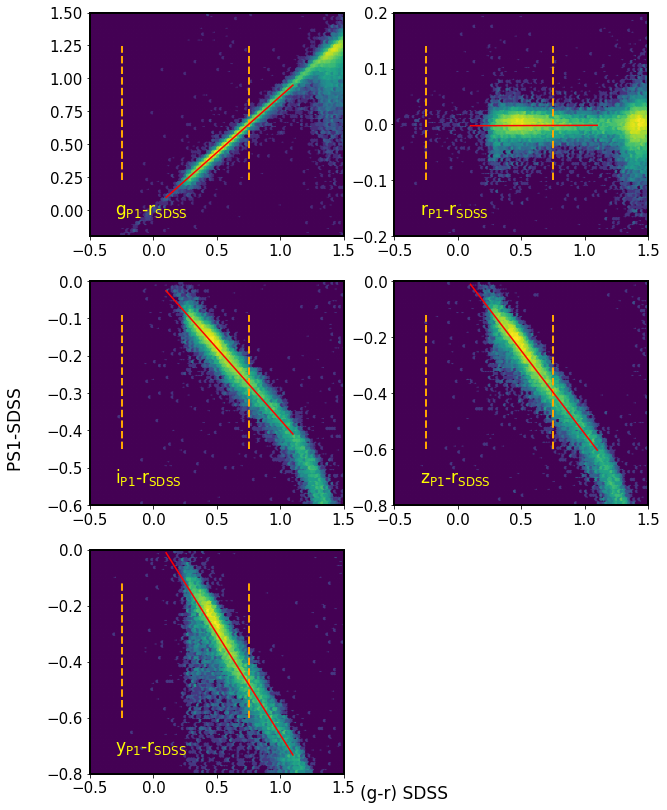

In [78]:
# Second : plot 
# (g-r) SDSS  vs PS1 (grizy) - SDSS(r) 
# thus bringing all PS1 filters to synthetic SDSS r filter 

## SDSS(g-r) vs PS1(g)-SDSS(r) ,
## SDSS(g-r) vs PS1(r)-SDSS(r) 
## SDSS(g-r) vs PS1(i)-SDSS(r) 
## SDSS(g-r) vs PS1(z)-SDSS(r) 
## SDSS(g-r) vs PS1(y)-SDSS(r) 

# this is a modification of first plot 
%matplotlib inline 
x = sdss_ps1['g_mMed'] - sdss_ps1['r_mMed']  # SDSS (g-r)

ymax = {'g':1.5,'r':0.2, 'i':   0,'z':0,   'y':0}
ymin = {'g':-0.2,'r':-0.2,'i':-0.6,'z':-0.8,'y':-0.8}

# mark the limit for fitting ... 
xQSOlims = [-0.25, 0.75]
xFITlims = [0.1, 1.1]

fig,axs = plt.subplots(3,2, figsize=(10,14))
ax = np.ravel(axs)
i = 0 
for f1,f2 in zip('grizy', 'rrrrr'):
    m1 = sdss_ps1[f1+'MeanPSFMag'] > 0
    y  = sdss_ps1[f1+'MeanPSFMag'] - sdss_ps1[f2+'_mMed']  # fPS1 - fSDSS
    
    # remove stars that have no obs in that filter 
    ax[i].hexbin(x[m1],y[m1], extent= (-0.5,1.5, ymin[f1],ymax[f1]), bins='log'
                 )
    ax[i].text(x = 0.1, y=0.1, s = f1+r'$_{\mathrm{P1}}$'+'-'+f2+r'$_{\mathrm{SDSS}}$', 
           color='yellow', fontsize=17, transform=ax[i].transAxes)
    
    # mark with vertical lines  the range occupied by QSO
    # the y limits are in axis coords 
    ax[i].axvline(xQSOlims[0], ymin=0.25, ymax=0.85 , ls='--', lw=2, c='orange')
    ax[i].axvline(xQSOlims[1], ymin=0.25, ymax=0.85, ls='--', lw=2, c='orange')
    
    # make my own linear fits 
    m2 = (xFITlims[0]<x)*(x<xFITlims[1]) # within the vertical dashed lines 
    m3 = (ymin[f1] < y) *(y < ymax[f1]) # within the ylims of the plot 
    m_ = m1*m2*m3
    
    if f1 is 'y' :  # remove points below this line ...
        x1,y1 = 0.0, -0.2
        x2,y2 = 1.0, -0.8
        a = (y2-y1)/ (x2-x1)
        b = y1-a*x1
        m4 = y > (a * x + b )
        m_ = m1*m2*m3 * m4
        
    xf  = x[m_] ;  yf=y[m_]
    #ax[i].scatter(xf,yf , s=0.01)
    p = np.polyfit(xf,yf,deg=1)
    x_ = np.linspace(xFITlims[0],xFITlims[1], 100)
    ax[i].plot(x_, p[0]*x_ + p[1], c='red')
    
    i += 1 
    
    
ax[i].set_visible(False) #  to remove the last subplot 
fig.text(0.5,0.1, '(g-r) SDSS ', fontsize=17)
fig.text(0.01,0.5, 'PS1-SDSS ', fontsize=17, rotation=90)

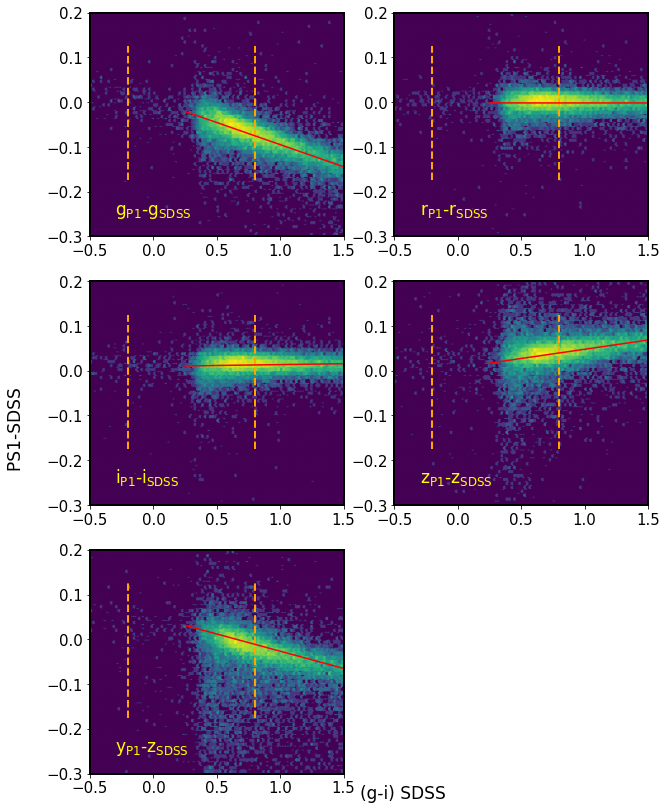

In [79]:
# Thirdly,  use (g-i) SDSS rather than (g-r), 
# making synthetic  SDSS grizz from PS1 grizy 

## SDSS(g-i) vs PS1(g)-SDSS(g) ,
## SDSS(g-i) vs PS1(r)-SDSS(r) 
## SDSS(g-i) vs PS1(i)-SDSS(i) 
## SDSS(g-i) vs PS1(z)-SDSS(z) 
## SDSS(g-i) vs PS1(y)-SDSS(z) 

# modifying first plot ... 
%matplotlib inline 
x = sdss_ps1['g_mMed'] - sdss_ps1['i_mMed']  # SDSS (g-i)
ymin = {'g':-0.3,'r':-0.3,'i':-0.3,'z':-0.3,'y':-0.3}
ymax = {'g':0.2,'r':0.2, 'i':0.2, 'z':0.2,   'y':0.2}

# mark the limit for SDSS S82 quasars : 1 dex in color spac
xQSOlims = [ -0.2, 0.8 ]
xFITlims = [0.25, 1.5]

fig,axs = plt.subplots(3,2, figsize=(10,14))
ax = np.ravel(axs)
i = 0 
for f1,f2 in zip('grizy', 'grizz'):
    m1 = sdss_ps1[f1+'MeanPSFMag'] > 0
    y = sdss_ps1[f1+'MeanPSFMag'] - sdss_ps1[f2+'_mMed']  # fPS1 - fSDSS
    
    # remove stars that have no obs in that filter 
    ax[i].hexbin(x[m1],y[m1], extent= (-0.5,1.5, ymin[f1],ymax[f1]), bins='log'
                 )
    ax[i].text(x = 0.1, y=0.1, s = f1+r'$_{\mathrm{P1}}$'+'-'+f2+r'$_{\mathrm{SDSS}}$', 
           color='yellow', fontsize=17, transform=ax[i].transAxes)
    
    # mark with vertical lines  the range occupied by QSO
    # the y limits are in axis coords 
    ax[i].axvline(xQSOlims[0], ymin=0.25, ymax=0.85 , ls='--', lw=2, c='orange')
    ax[i].axvline(xQSOlims[1], ymin=0.25, ymax=0.85, ls='--', lw=2, c='orange')
    
    # make my own linear fits 
    m2 = (xFITlims[0]<x)*(x<xFITlims[1]) # within the vertical dashed lines 
    m3 = (ymin[f1] < y) *(y < ymax[f1]) # within the ylims of the plot 

    m_ = m1*m2*m3
    
    if f1 is 'y' :  # remove points below this line for y_PS1
        x1,y1 = 0.0, 0
        x2,y2 = 1.5, -0.1
        a = (y2-y1)/ (x2-x1)
        b = y1-a*x1
        m4 = y > (a * x + b )
        m_ = m1*m2*m3 * m4
        

    xf  = x[m_] ;  yf=y[m_]
    #ax[i].scatter(xf,yf , s=0.01)
    p = np.polyfit(xf,yf,deg=1)
    x_ = np.linspace(xFITlims[0],xFITlims[1], 100)
    ax[i].plot(x_, p[0]*x_ + p[1], c='red')
    
    i += 1 
    
    
ax[i].set_visible(False) #  to remove the last subplot 
fig.text(0.5,0.1, '(g-i) SDSS ', fontsize=17)
fig.text(0.01,0.5, 'PS1-SDSS ', fontsize=17, rotation=90) 

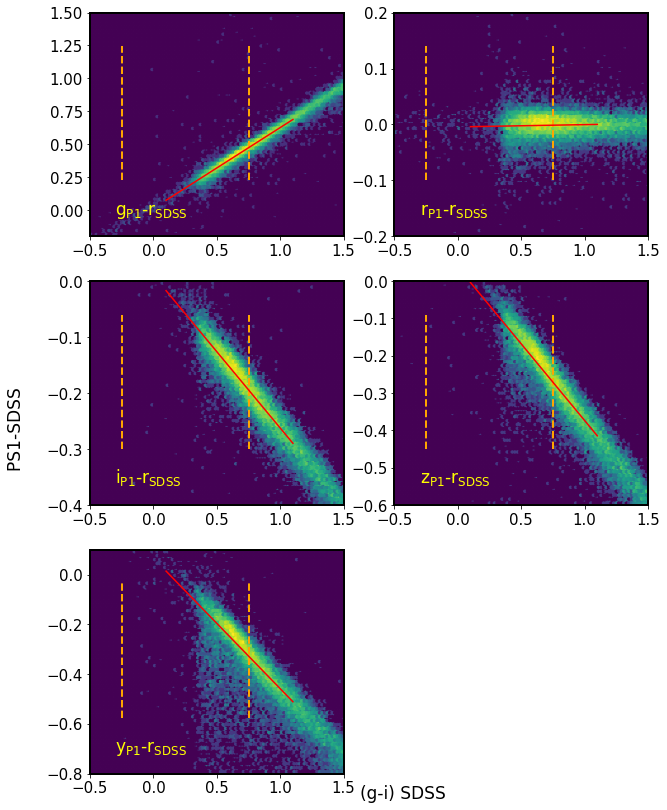

In [85]:
# Fourth : plot 
# (g-i) SDSS  vs PS1 (grizy) - SDSS(r) 
# thus bringing all PS1 filters to synthetic SDSS r filter 

## SDSS(g-i) vs PS1(g)-SDSS(r) ,
## SDSS(g-i) vs PS1(r)-SDSS(r) 
## SDSS(g-i) vs PS1(i)-SDSS(r) 
## SDSS(g-i) vs PS1(z)-SDSS(r) 
## SDSS(g-i) vs PS1(y)-SDSS(r) 

# modifying third plot 

%matplotlib inline 
x = sdss_ps1['g_mMed'] - sdss_ps1['i_mMed']  # SDSS (g-i)

# lims like in second plot 
ymax = {'g':1.5,'r':0.2, 'i':   0,'z':0,   'y':0.1}
ymin = {'g':-0.2,'r':-0.2,'i':-0.4,'z':-0.6,'y':-0.8}

# mark the limit for fitting ... 
# like in third plot
xQSOlims = [ -0.2, 0.8 ]
xFITlims = [0.25, 1.5]

fig,axs = plt.subplots(3,2, figsize=(10,14))
ax = np.ravel(axs)
i = 0 
for f1,f2 in zip('grizy', 'rrrrr'):
    m1 = sdss_ps1[f1+'MeanPSFMag'] > 0
    y  = sdss_ps1[f1+'MeanPSFMag'] - sdss_ps1[f2+'_mMed']  # fPS1 - fSDSS
    
    # remove stars that have no obs in that filter 
    ax[i].hexbin(x[m1],y[m1], extent= (-0.5,1.5, ymin[f1],ymax[f1]), bins='log'
                 )
    ax[i].text(x = 0.1, y=0.1, s = f1+r'$_{\mathrm{P1}}$'+'-'+f2+r'$_{\mathrm{SDSS}}$', 
           color='yellow', fontsize=17, transform=ax[i].transAxes)
    
    # mark with vertical lines  the range occupied by QSO
    # the y limits are in axis coords 
    ax[i].axvline(grQSOlims[0], ymin=0.25, ymax=0.85 , ls='--', lw=2, c='orange')
    ax[i].axvline(grQSOlims[1], ymin=0.25, ymax=0.85, ls='--', lw=2, c='orange')
    
    # make my own linear fits 
    m2 = (grFITlims[0]<x)*(x<grFITlims[1]) # within the vertical dashed lines 
    m3 = (ymin[f1] < y) *(y < ymax[f1]) # within the ylims of the plot 
    m_ = m1*m2*m3
    
    if f1 is 'y' :  # remove points below this line ...
        x1,y1 = 0.0, -0.2
        x2,y2 = 1.0, -0.6
        a = (y2-y1)/ (x2-x1)
        b = y1-a*x1
        m4 = y > (a * x + b )
        m_ = m1*m2*m3 * m4
        
    xf  = x[m_] ;  yf=y[m_]
    #ax[i].scatter(xf,yf , s=0.01)
    p = np.polyfit(xf,yf,deg=1)
    x_ = np.linspace(grFITlims[0],grFITlims[1], 100)
    ax[i].plot(x_, p[0]*x_ + p[1], c='red')
    
    i += 1 
    
    
ax[i].set_visible(False) #  to remove the last subplot 
fig.text(0.5,0.1, '(g-i) SDSS ', fontsize=17)
fig.text(0.01,0.5, 'PS1-SDSS ', fontsize=17, rotation=90)

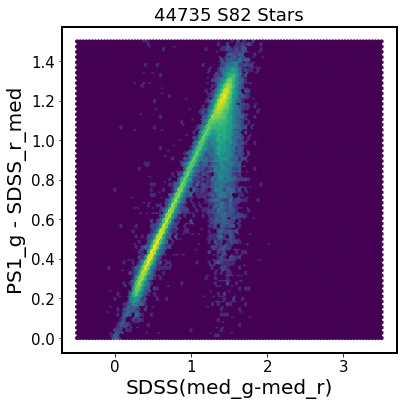

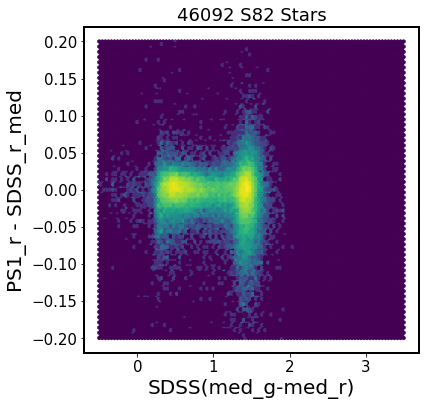

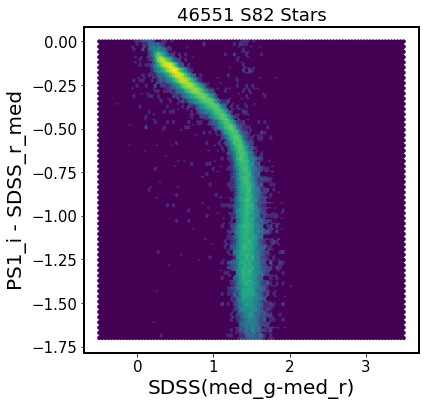

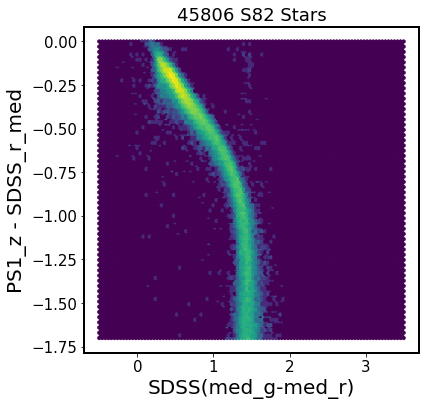

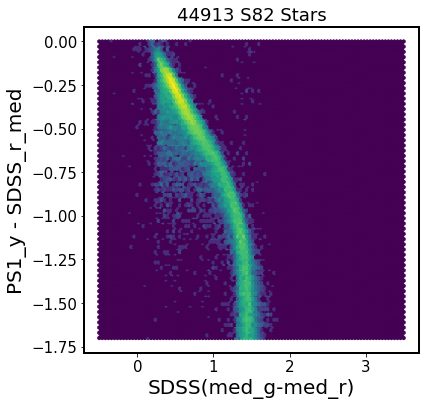

In [496]:

## I plot 
## SDSS(g-r) vs PS1(g)-SDSS(r) ,
## SDSS(g-r) vs PS1(r)-SDSS(r) 
## SDSS(g-r) vs PS1(i)-SDSS(r) 
## SDSS(g-r) vs PS1(z)-SDSS(r) 
## SDSS(g-r) vs PS1(y)-SDSS(r) 


## plot the raw SDSS-PS1  magnitudes 
ymin = {'g':0.0,'r':-0.2,'i':-1.7,'z':-1.7,'y':-1.7}
ymax = {'g':1.5,'r':0.2, 'i':   0,'z':0,   'y':0}
for f in 'grizy' : 
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    # select only those stars that have obs in that filter ...
    # 
    m = sdss_ps1[f+'MeanPSFMag'] > 0
    ax.hexbin(sdss_ps1['g_mMed'][m]-sdss_ps1['r_mMed'][m],
               sdss_ps1[f+'MeanPSFMag'][m]-sdss_ps1['r_mMed'][m],
               extent= (-0.5,3.5, ymin[f],ymax[f]), bins='log'
                 )

    ax.set_xlabel('SDSS(med_g-med_r)')
    ax.set_ylabel('PS1_'+f+' - SDSS_r_med')
    ax.set_title(str(np.sum(m))+' S82 Stars')
    plt.savefig('SDSSg-R_vs_PS1'+f+'-SDSS'++'.png', bbox_inches='tight')




Derive my own corrections from PS1(grizy) vis  SDSS(g-i) to SDSS(r) : 

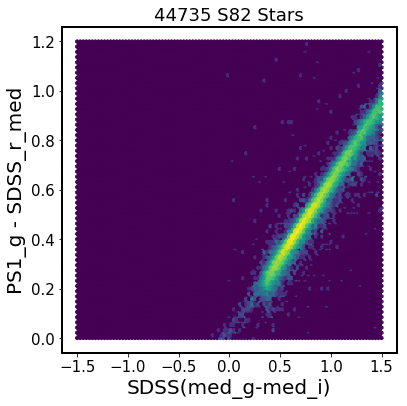

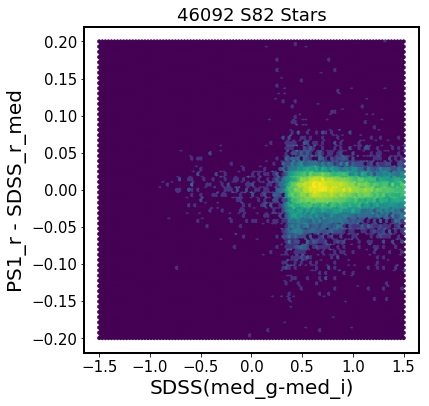

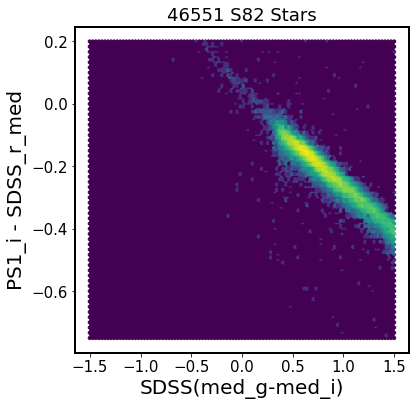

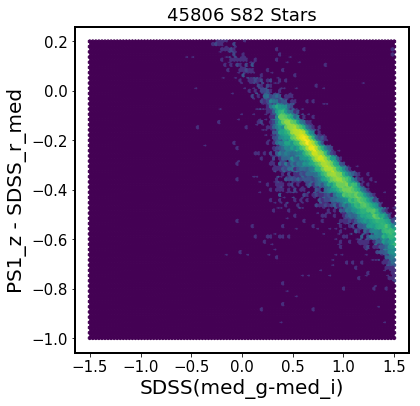

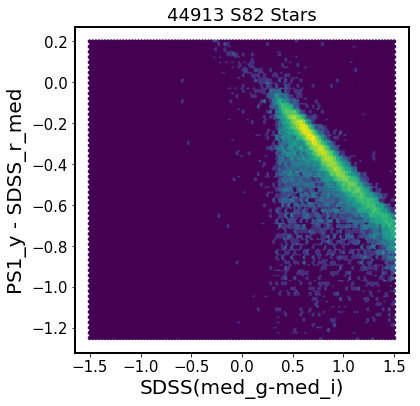

In [514]:
# I also plot 
## SDSS(g-i) vs  PS1(g) - SDSS(r) ,  
## SDSS(g-i) vs  PS1(r) - SDSS(r) ,  
## SDSS(g-i) vs  PS1(i) - SDSS(r) ,  
## SDSS(g-i) vs  PS1(z) - SDSS(r) ,  
## SDSS(g-i) vs  PS1(y) - SDSS(r) ,  

# because this was Zeljko's suggested way to 
# bring all things to SDSS(r) pretty much ... 

ymin = {'g':0,'r':-0.2,'i':-0.75,'z':-1,'y':-1.25}
ymax = {'g':1.2,'r':0.2,'i':0.2,'z':0.2,'y':0.2}
for f in 'grizy' : 
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    # select only those stars that have obs in that filter ...
    # 
    m = sdss_ps1[f+'MeanPSFMag'] > 0
    ax.hexbin(sdss_ps1['g_mMed'][m]-sdss_ps1['i_mMed'][m],
               sdss_ps1[f+'MeanPSFMag'][m]-sdss_ps1['r_mMed'][m],
               extent= (-1.5,1.5, ymin[f],ymax[f]), bins='log'
                 )

    ax.set_xlabel('SDSS(med_g-med_i)')
    ax.set_ylabel('PS1_'+f+' - SDSS_r_med')
    ax.set_title(str(np.sum(m))+' S82 Stars')
    plt.savefig('SDSSg-i_vs_PS1'+f+'-SDSSr.png', bbox_inches='tight')





They all look like straight lines... Let's fit just a first degree polynomial : 

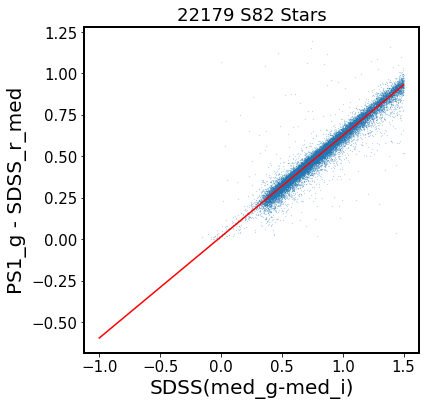

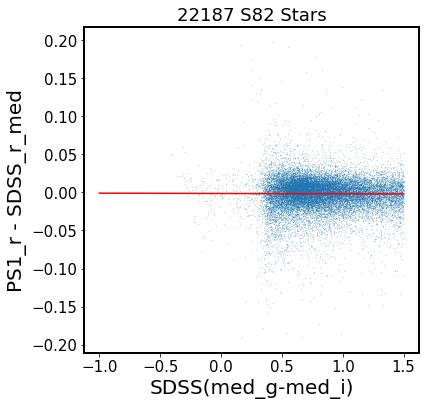

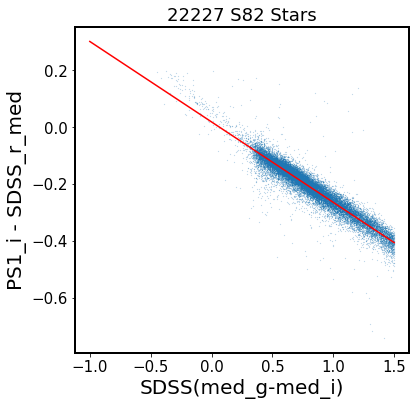

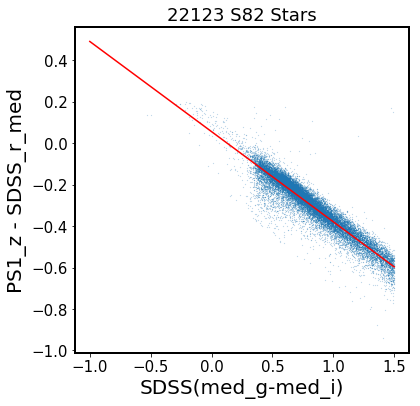

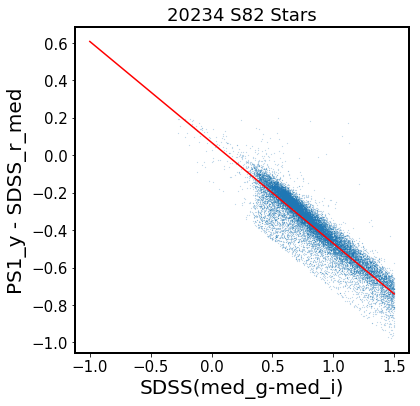

In [530]:
ymin = {'g':0,'r':-0.2,'i':-0.75,'z':-1,'y':-1.25}
ymax = {'g':1.2,'r':0.2,'i':0.2,'z':0.2,'y':0.2}
ps1_to_sdss_r = {}
for f in 'grizy' : 
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    # select only those stars that have obs in that filter ...
    # 
    m1 = sdss_ps1[f+'MeanPSFMag'] > 0
    gi = sdss_ps1['g_mMed']-sdss_ps1['i_mMed']
    ps = sdss_ps1[f+'MeanPSFMag'] - sdss_ps1['r_mMed']
    m2 = (-1<gi)*(gi<1.5)
    m3 = (ymin[f] < ps) *(ps < ymax[f])
    
    # remove the lower corner because it puts the fitting function
    # away 
    x1,y1 = 0.4,-0.4
    x2,y2 = 1.5,-1
    a = (y2-y1)/(x2-x1)
    b = y1 - a*x1
    m4 = ps > (a*gi + b)
    
    m = m1*m2*m3*m4
    x  = gi[m] ;  y=ps[m]
    ax.scatter(gi[m],ps[m] , s=0.01)
    p = np.polyfit(x,y,deg=1)
    ps1_to_sdss_r[f] = p
    
    x_ = np.linspace(-1,1.5, 1000)
    ax.plot(x_, p[0]*x_ + p[1], c='red')
    ax.set_xlabel('SDSS(med_g-med_i)')
    ax.set_ylabel('PS1_'+f+' - SDSS_r_med')
    ax.set_title(str(np.sum(m))+' S82 Stars')
    #plt.savefig('SDSSg-i_vs_PS1'+f+'-SDSSr.png', bbox_inches='tight')




In [532]:
# apply my correction and see how well it works ...
sdss_ps1['synth_SDSS_r2'] = -99 
x = sdss_ps1['g_mMed']-sdss_ps1['i_mMed']

for f in 'grizy' : 
    p = ps1_to_sdss_r[f]
    sdss_ps1['synth_SDSS_r2'] = sdss_ps1[f+'MeanPSFMag'] - ( p[0]*x + p[1]) 
    

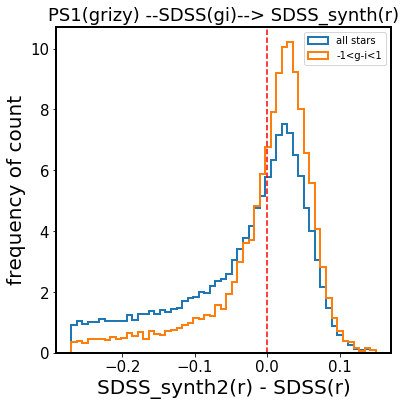

In [540]:
# show how it worked...
## plot after correctoin :  SDSS_r_synth-  SDSS_r_true, 
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.hist(sdss_ps1['synth_SDSS_r2']-  sdss_ps1['r_mMed'], bins=55,
           range = (-0.27,0.15), histtype='step',normed='True',
           lw=2, label='all stars')

gi = sdss_ps1['g_mMed']-sdss_ps1['i_mMed']
m = (-1< gi)* ( gi<1)
ax.hist(sdss_ps1['synth_SDSS_r2'][m]-  sdss_ps1['r_mMed'][m], bins=55,
           range = (-0.27,0.15), histtype='step',normed='True',
           lw=2, label='-1<g-i<1')

ax.axvline(0, ls='--', c='red')
plt.legend()
ax.set_xlabel('SDSS_synth2(r) - SDSS(r)')
ax.set_title('PS1(grizy) --SDSS(gi)--> SDSS_synth(r)')
ax.set_ylabel('frequency of count')
plt.savefig('PS1_SDSS_synthetic_rmag_compare.png', bbox_inches='tight')

This is off, but it essentially looks like a sum of all histograms from Tonry, which in a way it is ... I don't think its any worse than Tonry+2012, and at least it brings all to SDSS(r)... But I'll apply that later.  

In [459]:
## apply correction from Tonry+2012
x = sdss_ps1['g_mMed'] - sdss_ps1['r_mMed'] 

# convert PS1 to SDSS synthetic filters ... 
for row,f_ps1 in enumerate('grizy'):
    a0 = tonry[row]['A_0']
    a1 = tonry[row]['A_1']
    a2 = tonry[row]['A_2']
    print(tonry['x'][row],tonry['y'][row])
    
    f_synth = 'synth_SDSS_'+tonry[row]['y'][6]
    sdss_ps1[f_synth] = sdss_ps1[f_ps1+'MeanPSFMag'] - a0-a1*x-a2*x*x
    

(g-r)_SDSS (g_P1-g_SDSS)
(g-r)_SDSS (r_P1-r_SDSS)
(g-r)_SDSS (i_P1-i_SDSS)
(g-r)_SDSS (z_P1-z_SDSS)
(g-r)_SDSS (y_P1-z_SDSS)


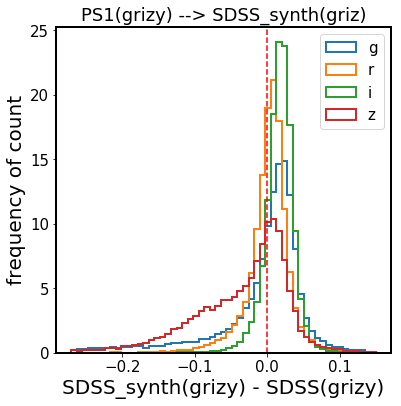

In [463]:
## plot after correctoin :  SDSS_r_synth-  SDSS_r_true,  ectc. :  all as histogram s
fig,ax = plt.subplots(1,1,figsize=(6,6))
for f in 'griz':
    ax.hist(sdss_ps1['synth_SDSS_'+f]-  sdss_ps1[f+'_mMed'], bins=55,
           range = (-0.27,0.15), histtype='step', normed=True,
           lw=2, label=f)
ax.axvline(0, ls='--', c='red')
plt.legend()
ax.set_xlabel('SDSS_synth(grizy) - SDSS(grizy)')
ax.set_title('PS1(grizy) --> SDSS_synth(griz)')
ax.set_ylabel('frequency of count')
plt.savefig('PS1_SDSS_synthetic_mag_compare.png', bbox_inches='tight')

In [458]:
# 

'z'

In [ ]:
### OBSOLETE : PS1 results form the web query  againt 10 000 S82 stars 

ps1_stars = Table.read('panstarrs_stackobject_search-4.txt', format='ascii')

# tried doing line by line ... 
fname = 'panstarrs_stackobject_search-4.txt'
f = open(fname, 'r')
lines = f.readlines()
f.close()
names = lines[1].strip().split()
dtype = lines[2].strip().split()

# ok , so the problem here is that there is more than one result for SDSS query...
# could take the first one for each ... 

# I also submitted a CasJobs query... we'll see how it works 

sdss_ra = []
sdss_dec = []
sdss_n = []
sdss_line_n = []

# collect all lines that tell which 
# SDSS ra, dec were queried against PS1 database 
n = 4
while n <  len(lines) : 
    if np.abs(len(lines[n]) - 32) < 15 : 
        #print(lines[n], len(lines[n]))
        sdss = lines[n].strip().split()
        sdss_n.append(int(sdss[2][:-1]))
        sdss_ra.append(float(sdss[3]))
        sdss_dec.append(float(sdss[4]))
        sdss_line_n.append(n)
    n += 2 
    
    
# grab the first line of the result - many times there's more 
# than one result, which doesn't help., 
# so I'm going to take just the first object 
# matched to each SDSS star ... .
sdss_no_match_n = []
sdss_with_match_n = []
for i in range(len(sdss_line_n)):
    n = sdss_line_n[i]
    if len(lines[n+1]) > 30 : 
        sdss_with_match_n.append(n)
    
#Okay, so that many SDSS S82 stars have at least one PS1 match within 2 arcsec :
len(sdss_with_match_n)

# the below doesn't work within Hubble time 
ps1_stars = Table()
# store these PS1 matches 
for i in range(len(sdss_with_match_n)):
    n = sdss_with_match_n[i]
    ps1_results = lines[n+1].strip().split()
    lineN = Table(data = np.asarray(ps1_results[1:]), names = names[:-2])
    ps1_stars = vstack([ps1_stars,lineN])